<a href="https://colab.research.google.com/github/rbadamas/AIHC-5010-Winter-2026/blob/main/Project-1/assignment1_perceptron_xor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Helper functions (accuracy, plotting)

In [3]:
def train_test_split(X, y, test_size=0.25, seed=42):
    rng = np.random.default_rng(seed)
    idx = np.arange(len(X))
    rng.shuffle(idx)
    split = int(len(X) * (1 - test_size))
    train_idx, test_idx = idx[:split], idx[split:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def plot_points(X, y, title="Dataset"):
    # y expected to be -1 or +1
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

## Perceptron implementation (from scratch)

In [4]:
class Perceptron:
    def __init__(self, lr=1.0, epochs=50):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None

    def predict(self, X):
        scores = X @ self.w + self.b
        # step function -> class labels -1 or +1
        return np.where(scores > 0, 1, -1)

    def fit(self, X, y):
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0.0

        for epoch in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                y_hat = 1 if (xi @ self.w + self.b) > 0 else -1
                if yi != y_hat:
                    # update rule
                    self.w = self.w + self.lr * yi * xi
                    self.b = self.b + self.lr * yi
                    errors += 1

            # stop early if perfect classification
            if errors == 0:
                break

        return self

## Dataset 1: linearly separable

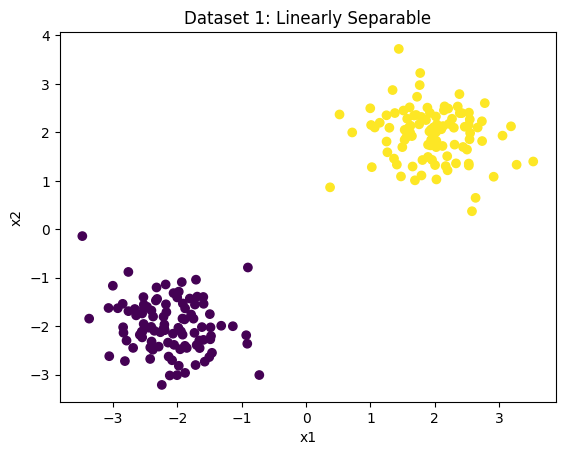

In [5]:
def make_linearly_separable(n=200, seed=0):
    rng = np.random.default_rng(seed)
    n_half = n // 2

    # Class +1 centered at (2, 2)
    X_pos = rng.normal(loc=2.0, scale=0.6, size=(n_half, 2))
    y_pos = np.ones(n_half)

    # Class -1 centered at (-2, -2)
    X_neg = rng.normal(loc=-2.0, scale=0.6, size=(n_half, 2))
    y_neg = -np.ones(n_half)

    X = np.vstack([X_pos, X_neg])
    y = np.concatenate([y_pos, y_neg]).astype(int)
    return X, y

X1, y1 = make_linearly_separable(n=200, seed=1)
plot_points(X1, y1, "Dataset 1: Linearly Separable")

## Train + evaluate on Dataset 1

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, seed=1)

model = Perceptron(lr=1.0, epochs=50)
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print("Train accuracy:", accuracy(y_train, pred_train))
print("Test accuracy:", accuracy(y_test, pred_test))
print("Weights:", model.w, "Bias:", model.b)

Train accuracy: 1.0
Test accuracy: 1.0
Weights: [1.62238705 2.13890664] Bias: 1.0


## Dataset 2: XOR Train + evaluate on XOR (show it fails)

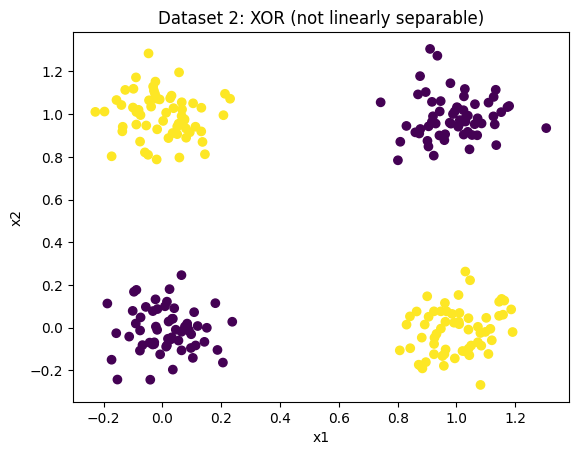

Train accuracy (XOR): 0.5166666666666667
Test accuracy (XOR): 0.4666666666666667
Weights: [ 1.85963141 -0.36066833] Bias: -1.0


In [7]:
def make_xor(repeats=50, noise=0.10, seed=0):
    rng = np.random.default_rng(seed)

    base_X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]
    ], dtype=float)

    base_y = np.array([-1, 1, 1, -1], dtype=int)

    X = np.repeat(base_X, repeats=repeats, axis=0)
    y = np.repeat(base_y, repeats=repeats, axis=0)

    X = X + rng.normal(0, noise, size=X.shape)
    return X, y

X2, y2 = make_xor(repeats=60, noise=0.10, seed=2)
plot_points(X2, y2, "Dataset 2: XOR (not linearly separable)")

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, seed=2)

model_xor = Perceptron(lr=1.0, epochs=100)
model_xor.fit(X_train, y_train)

pred_train = model_xor.predict(X_train)
pred_test = model_xor.predict(X_test)

print("Train accuracy (XOR):", accuracy(y_train, pred_train))
print("Test accuracy (XOR):", accuracy(y_test, pred_test))
print("Weights:", model_xor.w, "Bias:", model_xor.b)

The perceptron performs poorly on XOR because XOR is not linearly separable. A single perceptron can only learn a linear decision boundary, and no single line can separate the XOR classes.

In [12]:
for epochs in [10, 50, 200, 1000, 5000]:
    m = Perceptron(lr=1.0, epochs=epochs)
    m.fit(X_train, y_train)
    test_acc = accuracy(y_test, m.predict(X_test))
    print(f"Epochs={epochs:5d} | Test accuracy={test_acc:.3f}")

Epochs=   10 | Test accuracy=0.633
Epochs=   50 | Test accuracy=0.467
Epochs=  200 | Test accuracy=0.467
Epochs= 1000 | Test accuracy=0.467
Epochs= 5000 | Test accuracy=0.467


## Extra credit: simple model that solves XOR (2-layer neural net)

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_deriv(a):
    # a is sigmoid(z)
    return a * (1 - a)

In [9]:
class TinyNN_XOR:
    def __init__(self, lr=0.5, epochs=5000, seed=0):
        rng = np.random.default_rng(seed)
        # 2 -> 2 -> 1
        self.W1 = rng.normal(0, 1, size=(2, 2))
        self.b1 = np.zeros(2)
        self.W2 = rng.normal(0, 1, size=(2, 1))
        self.b2 = np.zeros(1)
        self.lr = lr
        self.epochs = epochs

    def forward(self, X):
        z1 = X @ self.W1 + self.b1
        a1 = sigmoid(z1)
        z2 = a1 @ self.W2 + self.b2
        a2 = sigmoid(z2)
        return a1, a2

    def predict(self, X):
        _, a2 = self.forward(X)
        # convert probability -> -1/+1
        return np.where(a2.ravel() > 0.5, 1, -1)

    def fit(self, X, y):
        # convert y from -1/+1 to 0/1 for sigmoid training
        y01 = ((y + 1) / 2).reshape(-1, 1)

        for _ in range(self.epochs):
            a1, a2 = self.forward(X)

            # binary cross entropy gradient w.r.t. output pre-activation:
            # for sigmoid + BCE, dL/dz2 = (a2 - y)
            dz2 = (a2 - y01)
            dW2 = a1.T @ dz2 / len(X)
            db2 = np.mean(dz2, axis=0)

            da1 = dz2 @ self.W2.T
            dz1 = da1 * sigmoid_deriv(a1)
            dW1 = X.T @ dz1 / len(X)
            db1 = np.mean(dz1, axis=0)

            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1

        return self

In [10]:
nn = TinyNN_XOR(lr=0.8, epochs=8000, seed=1)
nn.fit(X2, y2)

pred = nn.predict(X2)
print("Tiny NN XOR accuracy:", accuracy(y2, pred))

Tiny NN XOR accuracy: 1.0


## Conclusion

The perceptron achieved perfect accuracy on the linearly separable dataset, confirming it can learn a linear decision boundary. On XOR, accuracy stayed near chance even with more epochs because XOR is not linearly separable. A small 2-layer neural network solved XOR, showing that adding a hidden layer with a nonlinear activation enables learning non-linear decision boundaries.